Copyright 2020 Dale Bowman, Natasha A. Sahr, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Classification with KNN

The classification problem, simply stated, is to assign a new observation to a class, where the classes have been specified in advance. 
There are many different types of classifiers as we will see throughout this course.

The difference between classification and clustering is simple.
In clustering, we don't know the classes in advance, so we group observations together to try to discover the classes.
In classification, we know the classes in advance, so we train a model that can predict the class for any new observation.

Clustering is an _unsupervised_ method since the correct classes are unknown.
Classification is a _supervised_ method since the classes are known. 

We will look at a commonly used classifier, $\mathbf{k}$__-nearest neighbors__ (KNN).

### What you will learn

In this notebook you will learn about the problem of classification and how you can use your data to train a classifier that can be used to determine the class of a new observation.  We will study the following:

- k nearest neighbor
- Confusion matrices

### When to use classifiers

Classification is useful when you have a set of annotated data.  That is, for each set of features the true class is known.  In this case you can use the data to train a classifier so that when a new set of features is encountered with unknown class, you are able to infer its class from its features.

## $k$-Nearest Neighbor

The $k$-nearest neighbor (KNN) method of classification based on distance.
Consider the picture below.

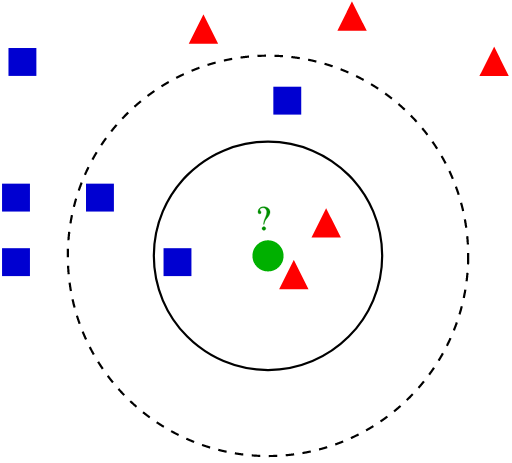

[By Antti Ajanki AnAj, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=2170282)

In this picture, we have a new observation represented by a green circle.
We want to predict its class, which is either a blue square or or a red triangle.
KNN does this by looking at the $K$ closest previous observations; in the picture, $K$ is 3 (solid line).
KNN predicts whatever class is the most common in the $K$ closest previous observations.
In this case, the most common class is red triangle (the three closest neighbors are two red triangles and one blue square), so KNN would predict the new observation (green circle) is a red triangle.

As you might guess, the value of $K$ can change KNN's behavior a lot.
If  $K=5$ (the dashed line in the picture above), the KNN prediction will change from red triangle  to blue square.
Imagine in the picture above if $K=11$, which is the total number of previous observations.
In that case, KNN will always predict whatever class is most common *overall* (in this case blue square).
This is bad because it means that the model will always be wrong for new observations that are red triangles.

### $k$-Nearest Neighbor Programming Example

The `iris.csv` dataset contains 5 variables:

| Variable    | Type    | Description           |
|:-------------|:---------|:-----------------------|
| SepalLength | Ratio   | the sepal length (cm) |
| SepalWidth  | Ratio   | the sepal width (cm)  |
| PetalLength | Ratio   | the petal length (cm) |
| PetalWidth  | Ratio   | the petal width (cm)  |
| Species     | Nominal | the flower species    |

<div style="text-align:center;font-size: smaller">
 <b>Source:</b> This dataset was taken from the <a href="https://archive.ics.uci.edu/ml/datasets/iris">UCI Machine Learning Repository library
    </a></div>
<br>

Let's load it into a dataframe.
First import the dataframe library `pandas`:

- `import pandas as pd`

In [1]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="importAs_Python" id="_@5-r*j4E`}d?=DXLinf" x="16" y="10"><field name="libraryName">pandas</field><field name="libraryAlias" id="/%IFN5#t2uAm}E`8:KV:">pd</field></block></xml>

Now load the dataframe:

- Create variable dataframe
- Set it to `with pd do read_csv using "datasets/iris.csv"`
- dataframe (to display)

In [2]:
dataframe = pd.read_csv('datasets/iris.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="11" y="186"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_Python" id="ny0sjvqTnn2B]K2za7Li"><field name="VAR" id="/%IFN5#t2uAm}E`8:KV:">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/iris.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


We need an additional library called `numpy`, which is a widely-used math library:

- `import numpy as np`

In [3]:
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable></variables><block type="importAs_Python" id="6{E|A)Ya_2{hXV^n,QJP" x="16" y="10"><field name="libraryName">numpy</field><field name="libraryAlias" id="Zhzp)s*VL?V@ES3(j:*b">np</field></block></xml>

#### Preparing the data

Remember that when we train a classification model, we tell the program what the class labels are.

To do this, we're going to split our dataframe into two pieces:

- Everything but the labels
- The labels by themselves

Let's start with everything but the labels:

- Create variable `X` (this is uppercase X)
- Set it to `dataframe [ ] ` and put inside it the following in a list
    - `"SepalLength"`
    - `"SepalWidth"`
    - `"PetalLength"`
    - `"PetalWidth"`
- `X` (to display)

**Note: Use `{dictVariable} []` in LISTS and change to `dataframe [ ] `**

In [6]:
X = dataframe[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="py,.kr!f9i=.v7I5_d+^">X</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="variables_set" id="46~F|Y~BiXd|Vok0}p,p" x="33" y="69"><field name="VAR" id="py,.kr!f9i=.v7I5_d+^">X</field><value name="VALUE"><block type="indexer_Python" id="p,##xUo8Nj3`vpMVBjr8"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="INDEX"><block type="lists_create_with" id="a.wA7Xdx%GbQ)t#XDKvV"><mutation items="4"></mutation><value name="ADD0"><block type="text" id="aZG|GLqavO~,RXBOcuJ+"><field name="TEXT">SepalLength</field></block></value><value name="ADD1"><block type="text" id="b/mW9(0w,rS.ny;Y(]5A"><field name="TEXT">SepalWidth</field></block></value><value name="ADD2"><block type="text" id="4yc?!4pnBI1/rSBQ41!t"><field name="TEXT">PetalLength</field></block></value><value name="ADD3"><block type="text" id="2biSAqV~ba^2sL^FlfyH"><field name="TEXT">PetalWidth</field></block></value></block></value></block></value></block><block type="variables_get" id="W]bu*LAe{2;n#?+7WQ-[" x="30" y="219"><field name="VAR" id="py,.kr!f9i=.v7I5_d+^">X</field></block></xml>

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Now do the same thing with `Species` but save in `Y`.
These are our class labels!
You may wish to copy your blocks above and modify:

- Create variable `Y`
- Set it to `dataframe [ ] ` containing the following in a list
    - `"Species"`
- `Y` (to display)

In [7]:
Y = dataframe[['Species']]

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="@83Gxqb{/h|%%9Yr?2q!">Y</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="variables_set" id="46~F|Y~BiXd|Vok0}p,p" x="33" y="69"><field name="VAR" id="@83Gxqb{/h|%%9Yr?2q!">Y</field><value name="VALUE"><block type="indexer_Python" id="p,##xUo8Nj3`vpMVBjr8"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="INDEX"><block type="lists_create_with" id="a.wA7Xdx%GbQ)t#XDKvV"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="aZG|GLqavO~,RXBOcuJ+"><field name="TEXT">Species</field></block></value></block></value></block></value></block><block type="variables_get" id="W]bu*LAe{2;n#?+7WQ-[" x="30" y="219"><field name="VAR" id="@83Gxqb{/h|%%9Yr?2q!">Y</field></block></xml>

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


Now we're going to introduce a new idea, **train/test data splitting**.
This is a bit like sampling from a dataframe, which we've already done, but instead of sampling just a few rows, we randomize all the rows (like shuffling a deck of cards) and then split the rows into two new dataframes (like splitting a deck of cards).

The reason for this is that we want to keep some of the data from the classifier so that we can test the classifier on data its never seen.
We do this because we are not interested in whether the classifier can memorize the data; we want to see if the classifier can **generalize** to new data.

So next we are going to split our `X` and `Y` into train and test sets. 
That means we'll end up with four data frames: `Xtrain`, `Xtest`, `Ytrain`, `Ytest`.

First, the import for splitting:

- `import sklearn.model_selection as model_selection`

In [8]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable></variables><block type="importAs_Python" id="sN1YO5FEzpHyxb31@j,Z" x="16" y="10"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="uASGz64Zb$AOvQyV4pRj">model_selection</field></block></xml>

Now do the splits:

- Create variable `splits`
- Set it to `with model_selection do train_test_split using` a list containing
    - `X` (the features in an array)
    - `Y` (the labels in an array)
    - freestyle `test_size=0.2` (the proportion of the dataset to include in the test split)
    
<!-- The resulting object will have 4 names: `X_train, X_test, Y_train, Y_test`.  -->

In [9]:
splits = model_selection.train_test_split(X, Y, test_size=0.2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable><variable id="py,.kr!f9i=.v7I5_d+^">X</variable><variable id="@83Gxqb{/h|%%9Yr?2q!">Y</variable></variables><block type="variables_set" id="oTGRJ#{R!U^we@Bl@pkT" x="31" y="224"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field><value name="VALUE"><block type="varDoMethod_Python" id="f?j@ker(a#hJv;Nh)IGX"><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="er6r2]}|nA;1;}VsM5I7"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id=".mm}`*H4)i%Eq5z={e-$"><field name="VAR" id="py,.kr!f9i=.v7I5_d+^">X</field></block></value><value name="ADD1"><block type="variables_get" id="I3dOV;CPBf^~E%BvgthZ"><field name="VAR" id="@83Gxqb{/h|%%9Yr?2q!">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="@Hg?ib/!8fH$;f3pWJy2"><field name="CODE">test_size=0.2</field></block></value></block></value></block></value></block></xml>

`splits` is actually a list that contains four dataframes:  `Xtrain`, `Xtest`, `Ytrain`, and `Ytest`.

Take a look at `Xtrain`:

- `in list splits get # 1` (in menu LISTS)

In [10]:
splits[0]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="lists_getIndex" id="4+/u48,dnx9B6buR/^{s" x="8" y="392"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="=;czY:o^AM7^+*f1rr8I"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="]1|M.P|wo?(_*@5jCfXG"><field name="NUM">1</field></block></value></block></xml>

,SepalLength,SepalWidth,PetalLength,PetalWidth
113,5.7,2.5,5.0,2.0
26,5.0,3.4,1.6,0.4
140,6.7,3.1,5.6,2.4
137,6.4,3.1,5.5,1.8
114,5.8,2.8,5.1,2.4
...,...,...,...,...
45,4.8,3.0,1.4,0.3
67,5.8,2.7,4.1,1.0
10,5.4,3.7,1.5,0.2
142,5.8,2.7,5.1,1.9


Now do the same for `Ytrain`:

- `in list splits get # 3`

In [11]:
splits[2]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="lists_getIndex" id="4+/u48,dnx9B6buR/^{s" x="8" y="392"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="=;czY:o^AM7^+*f1rr8I"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="]1|M.P|wo?(_*@5jCfXG"><field name="NUM">3</field></block></value></block></xml>

,Species
113,virginica
26,setosa
140,virginica
137,virginica
114,virginica
...,...
45,setosa
67,versicolor
10,setosa
142,virginica


Notice that `Xtrain` and `Ytrain` have the same number of rows and that their indexes (i.e. IDs) match, which they must, since each training example must have both features (the variables we are using to predict) and a label (the variable we are trying to predict).

If you displayed `Xtest` and `Ytest`, you would see a similar correspondence for the remaining rows in `iris.csv`.

So all we've done here is take the original dataframe and split it into four pieces:

- Training data: `Xtrain` and `Ytrain`, which have the same length as each other
- Testing data: `Xtest` and `Ytest`, which again have the same length as each other

We will use the training data to train the model and the testing data to test the model.
Both times we separate the class labels `Y` from the rest of the data `X`, because `X` is what we put into the model and `Y` is what we get out.

<!-- NOTE: scaling seems unnecessary: https://stats.stackexchange.com/questions/109071/standardizing-features-when-using-lda-as-a-pre-processing-step

We need to scale the features so `SepalWidth`, `SepalLength`, `PetalLength`, and `PetalWidth` are on the same scale. To do this, we need to from `sklearn.preprocessing` import the `StandardScaler` function. -->

<!-- # from sklearn.preprocessing import StandardScaler -->

<!-- Since `SepalWidth`, `SepalLength`, `PetalLength`, and `PetalWidth` are in `X_train` and `X_test`, we will transform both. 

First, use the function `fit_transform` with the object `X_train` on `StandardScaler()`. Rename the object `X_train1`. 

Next, use the function `fit_transform` with the object `X_test` on `StandardScaler()`. Rename the object `X_test1`.  -->

<!-- X_train1 = StandardScaler().fit_transform(X_train)
X_test1 = StandardScaler().fit_transform(X_test) -->

#### Training the model

We're now ready to train the KNN model, but first we need to load the library for KNN models!

So do the imports:

- `import sklearn.neighbors as neighbors`

In [12]:
import sklearn.neighbors as neighbors

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~%[Y}a{Syr+LrQ[I8?d(">neighbors</variable></variables><block type="importAs_Python" id="ayw$B{(evWs,ynm/fP%g" x="123" y="313"><field name="libraryName">sklearn.neighbors</field><field name="libraryAlias" id="~%[Y}a{Syr+LrQ[I8?d(">neighbors</field></block></xml>

We need to create the model before we can train it:

- Create variable `knn`
- Set it to `with neighbors create KNeighborsClassifier using` a list containing
    - freestyle `n_neighbors=5`
    
This last block means we will use 5 neighbors, which is the most commonly used value for the KNN algorithm. 

In [13]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="qiYg#10P*[{cvl~,g!4n">knn</variable><variable id="~%[Y}a{Syr+LrQ[I8?d(">neighbors</variable></variables><block type="variables_set" id="`z.|tb|jX$Y2a5;iN{pz" x="-7" y="283"><field name="VAR" id="qiYg#10P*[{cvl~,g!4n">knn</field><value name="VALUE"><block type="varCreateObject_Python" id="9i7]OHHOnhf2~MjH^n+y"><field name="VAR" id="~%[Y}a{Syr+LrQ[I8?d(">neighbors</field><field name="MEMBER">KNeighborsClassifier</field><data>neighbors:KNeighborsClassifier</data><value name="INPUT"><block type="lists_create_with" id="`.s=9G`sj;R8,?u+OR9Y"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="R*)t!8POzxw3}@cy,{:]"><field name="CODE">n_neighbors=5</field></block></value></block></value></block></value></block></xml>

Next we need to train the classifier. 
Remember the first and third elements in `splits` are `Xtrain` and `Ytrain`, respectively:

-  `with knn do fit using` a list containing
    - `in list splits get # 1` (in menu LISTS)
    - `with np do ravel using` a list containing
        - `in list splits get # 3` (in menu LISTS)
    
`ravel` is just a conversion function that turns our `Ytrain` dataframe into a list, which is what `fit` wants.

The steps that you've done are very common steps in creating models.
In a library like `sklearn`, similar operations (here training a model) will look the same.
So once you know how to train one model, you know how to train them all (for the most part, the parameters in `using` will change depending on the model).

In [15]:
knn.fit(splits[0], np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="qiYg#10P*[{cvl~,g!4n">knn</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod_Python" id="Z)$q-zn.KTC{+^l-wH6u" x="259" y="169"><field name="VAR" id="qiYg#10P*[{cvl~,g!4n">knn</field><field name="MEMBER">fit</field><data>knn:fit</data><value name="INPUT"><block type="lists_create_with" id="e_B;36VOJ^lH70V=aWY}"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="C#,#1*rEm+]qEx?L1x[L"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="b_Sz{9#d7d=ystO|k?l_"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=":s{r1~S,,@.CSh#9`$R;"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_Python" id="zYBlZ,!^P^%Ib5R@Ch.H"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="9s({WSn={~Ink.5O+6Cc"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="^)UBt0jM;BnGmWeG7pw*"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="4Vo!*g]qQ=D}XtD2i39/"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="RysCD3.C27sBxztz(T}2"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block></xml>

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Congratulations, you just trained a KNN classifier!**

#### Testing the model

As before, the final step is to predict classes with the test data:

- Create variable `predictions`
- Set it to `with knn do predict using` a list containing
    - `in list splits get # 2` 
- `predictions` (to display)

In [16]:
predictions = knn.predict(splits[1])

predictions

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="S${cx6mpro:A3F6)k7GU">predictions</variable><variable id="qiYg#10P*[{cvl~,g!4n">knn</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="variables_set" id="NHw$/HH988vNLbZgn)CM" x="88" y="212"><field name="VAR" id="S${cx6mpro:A3F6)k7GU">predictions</field><value name="VALUE"><block type="varDoMethod_Python" id="N}3ds6:i%0MtTA:(2im4"><field name="VAR" id="qiYg#10P*[{cvl~,g!4n">knn</field><field name="MEMBER">predict</field><data>knn:predict</data><value name="INPUT"><block type="lists_create_with" id="3Ru6U*^.a`oD7$bu/I%y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="I#4y[,+*#I5s;b;h3o/M" x="75" y="307"><field name="VAR" id="S${cx6mpro:A3F6)k7GU">predictions</field></block></xml>

array(['virginica', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa'],
      dtype=object)

**We now have performed all steps to train and predict classes with an KNN classifier!**

To be clear, `predictions` contains the predictions of `Species` from data the classifier has never seen before, which is exactly what we're interested in.

The above predictions are the most common class among the nearest neighbors, but we can also get the frequencies of the classes among the near neighbors for each of these predictions.
The KNN expresses these as a probability, i.e. for a new observation, what is the probability of each of the three classes of iris?

We can access this information too by using `predict_proba`:

- `with knn do predict_proba using` a list containing
    - `in list splits get # 2` (again, this is `Xtest`)

In [18]:
knn.predict_proba(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="qiYg#10P*[{cvl~,g!4n">knn</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod_Python" id="N}3ds6:i%0MtTA:(2im4" x="219" y="404"><field name="VAR" id="qiYg#10P*[{cvl~,g!4n">knn</field><field name="MEMBER">predict_proba</field><data>knn:predict_proba</data><value name="INPUT"><block type="lists_create_with" id="3Ru6U*^.a`oD7$bu/I%y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block></xml>

array([[0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ]])

Notice that for each prediction (a row) we have three probabilities that sum up to 1, corresponding to the three different `iris` species.

## Assessing the Classifier

Consider for a moment a classifier that always predicted species `versicolor`.
It wouldn't be very smart right?
You certainly wouldn't need any data to train it.
However, even this "dumb" classifier would be right 33% of the time, because `versicolor` is the correct class for 33% of the data.
We could make another "dumb" classifier by choosing from `versicolor`, `setosa`, and `virginica` randomly; it would also be right 33% of the time in this case.

These "dumb" classifiers illustrate why it is important to assess classifier performance.
If we don't do this extra step, we don't know if the classifier is working well or at all.
In general, people agree that if a classifier is no better than random or always choosing the same class, it isn't working at all.

To assess the performance of a classifier, we need to look at the mistakes it makes, starting with its **confusion matrix.**

### Confusion Matrix

For simplicity, consider a classifier where the response variable has only two classes, say positive (1) and negative (0). 
An example for this might be a test for coronavirus: either you get a positive test or a negative test.

A _confusion matrix_ is a tool to evaluate the predictive value of the classifier. 
The table below is an example of a confusion matrix for a two category classifier.

<!-- __Figure 2__ -->

<!-- 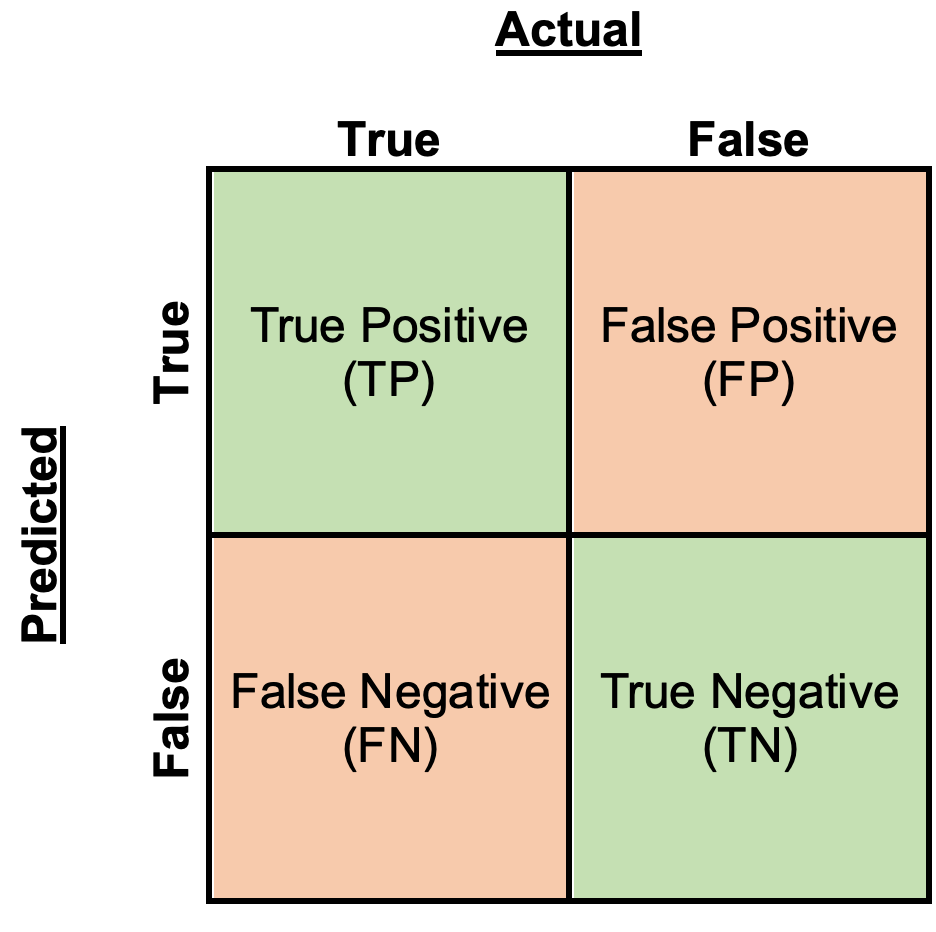 -->
<div>
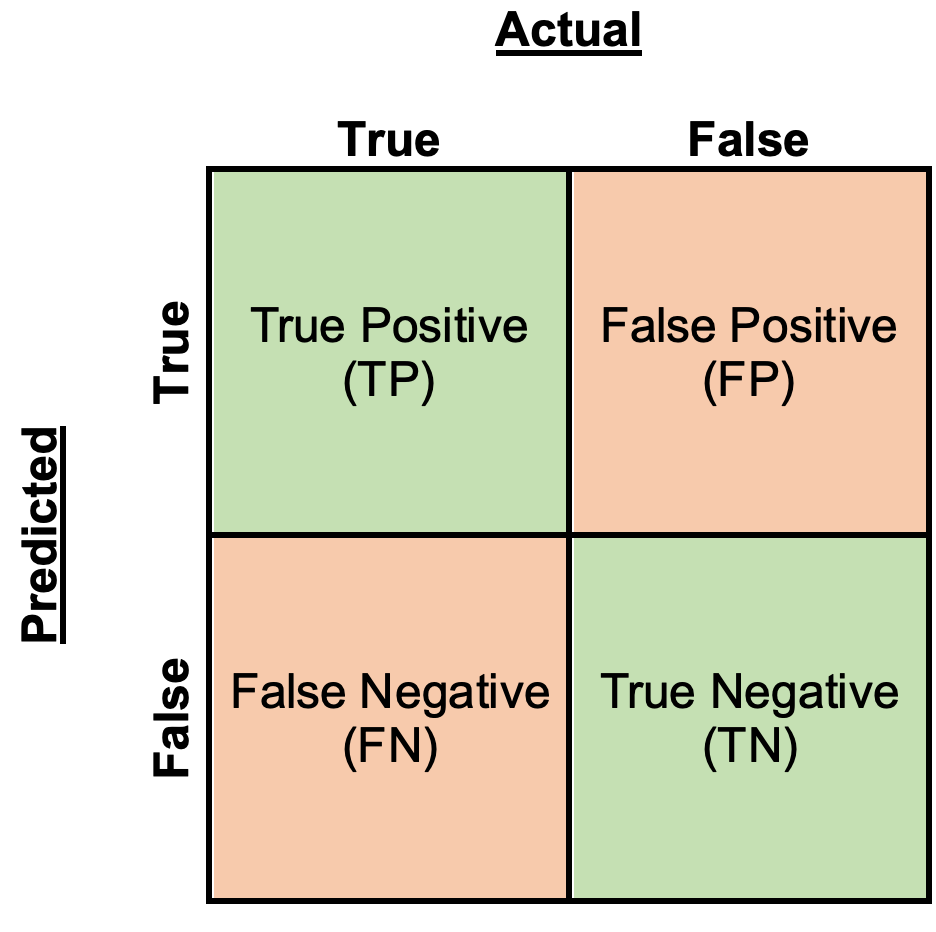
</div>

**Figure 2**

When making a classification, there are two ways to be correct.
A prediction is a true positive (TP) if the actual value was positive and the classifier predicted it to be positive. 
A prediction is a true negative (TN) if the actual value was negative and the classifier predicted it to be negative. 
TP and TN are correct predictions and should be large for a _good classifier_. 

There are also two ways to be wrong when making a classification.
A prediction is a false positive (FP) if the actual response was negative and the predicted response was positive. 
A prediction is a false negative (FN) if the actual response was positive and the classifier predicted it to be negative. 
FP and FN are errors and should be small for a _good classifier_. 

To summarize this, there are two ways to be right and two ways to be wrong.
The two ways to be right are TP and TN: saying something (e.g. the virus) is there when it's there, and saying something isn't there when it isn't there.
The two ways to be wrong are FP and FN: staying something is there when it isn't, and saying something isn't there when it is.

<!-- This is good, but I already wrote the above when I saw it and don't have time to combine -->

<!-- Consider a medical setting for evaluating diagnostic tests. TP is the number of people that have the disease and the test correctly showed that they have the disease. TN is the number of people that don’t have the disease and the test correctly says they don’t. FP is the number of people who do not have the disease but the test incorrectly predicts that they do and FN is the number of people who do have the disease but the test predicts they don’t. -->

While the four corners of the confusion matrix are useful by themselves, we can also construct metrics using them.
The most well-known metric is **accuracy** which is $TP+TN$ divided by the sum of everything in the matrix (how many times were you right divided by all the classifications you made). 

There are some additional measures used to assess classifiers in addition to accuracy, each of which highlights a different part of the classifier's performance.

The **sensitivity**, also called **recall**, is defined as the ratio of true positive to total number of actual positives, $\frac{TP}{TP+FN}$. 
In our disease example, sensitivity is the number of times we correctly said positive divided by then number of times the disease was present.
The sensitivity will be between 0 and 1. 
The better the classifier, the larger the sensitivity.

The **specificity**  is a similar measure for the negative response. 
It is the ratio of true negative to the total number of actual negatives, $\frac{TN}{TN+FP}$. 
In our disease example, specificity is the number of times we correctly said negative divided by then number of times the disease was *not* present.
The specificity is also between 0 and 1. 
The better the classifier, the larger the specificity. 

A measure of the error that is often used is the _false discovery rate_ (FDR). 
The FDR measures how many of the actual negative responses were predicted as positive by the classifier, $FDR = \frac{FP}{FP+TN} = 1 - \text{specificity}$. 
The better the classifier, the smaller the FDR. 

It is possible to construct confusion matrices for situations where there are more than two classes but the specificity, sensitivity and FDR are defined differently.

An expanded graphic is in Figure 3. 
<!-- Not sure what is meant by missing, so cutting for now -->
<!-- Can you spot the metric missing? -->

<!-- __Figure 3__ -->

<!-- 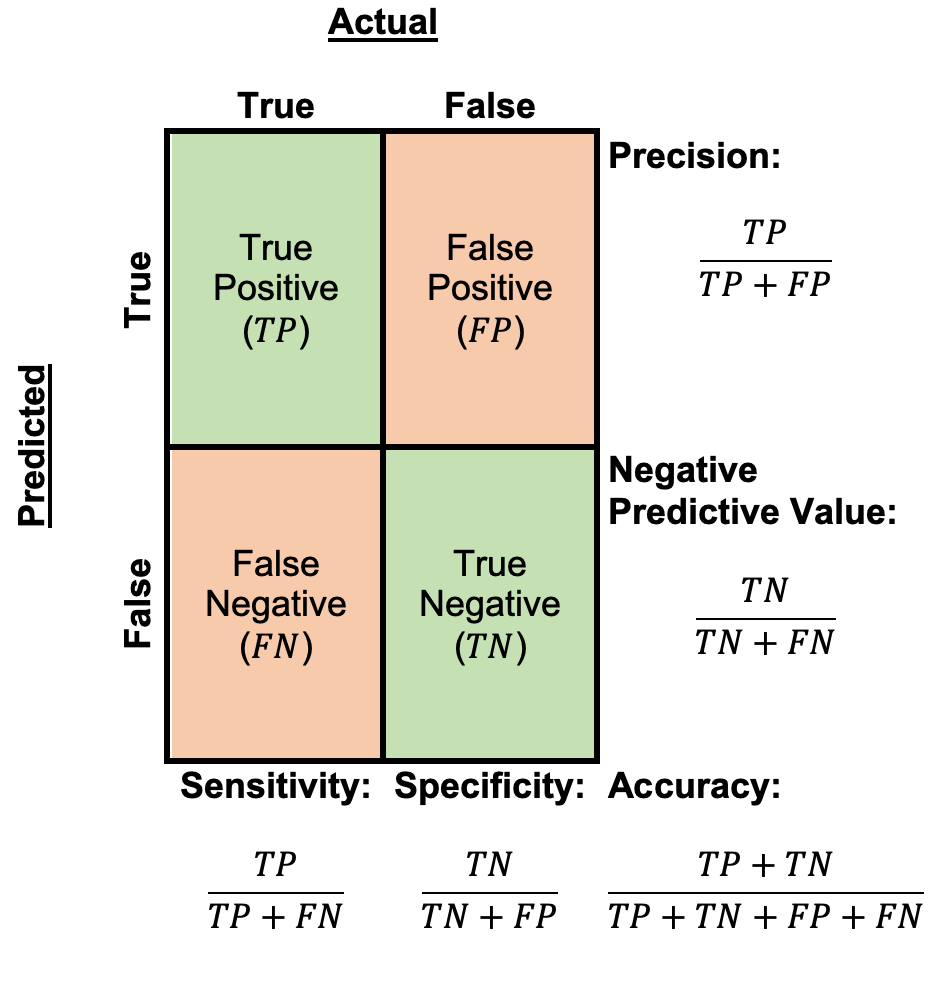 -->
<div>
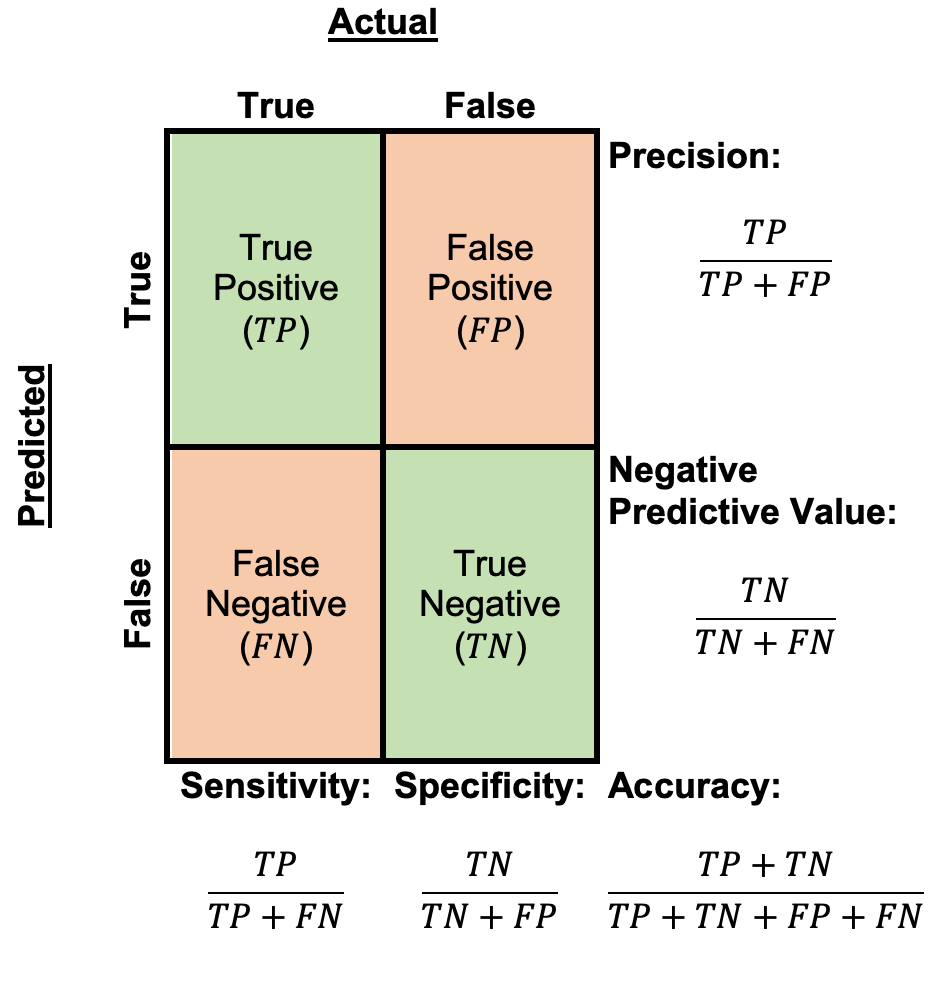
</div>

**Figure 3**

### KNN Programming Example cont.

Now that we know about confusion matrices, let's evaluate the performance of the KNN classifier for our test dataset. 
To do this, we only need two things:

- `Ytest` (the class labels from our test data split)
- `predictions` (our class label predictions from our KNN model)

First, the imports for computing performance metrics:

- `import sklearn.metrics as metrics`

<!-- We first need to import `confusion_matrix`, `classification_report`, and `accuracy_score` from `sklearn.metrics`. -->

In [19]:
import sklearn.metrics as metrics

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable></variables><block type="importAs_Python" id="|1fEPj_#9:@0Qa@y|1F." x="135" y="207"><field name="libraryName">sklearn.metrics</field><field name="libraryAlias" id="C8HQ^p):qDkQA/nhxe{{">metrics</field></block></xml>

Let's start with the confusion matrix:

- `with metrics do confusion_matrix using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`

In [20]:
metrics.confusion_matrix(splits[3], predictions)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="S${cx6mpro:A3F6)k7GU">predictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod_Python" id="l,28Y;cf6Q.r-rTBWP4}" x="8" y="188"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">confusion_matrix</field><data>metrics:confusion_matrix</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="S${cx6mpro:A3F6)k7GU">predictions</field></block></value></block></value></block></xml>

array([[ 7,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 11]])

You can see that most of the big numbers are on the diagonal, which means that we are classifying most classes correctly.

However, it can be hard to read the confusion matrix, especially this one, when the rows and columns aren't labeled.
Let's look at some of the other metrics that are calculated with this confusion matrix.

To get the accuracy:

- `with metrics do accuracy_score using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`
    
As you no doubt noticed, this is very similar to calling `confusion_matrix`, so you might like to copy blocks from that to save some time.

In [21]:
metrics.accuracy_score(splits[3], predictions)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="S${cx6mpro:A3F6)k7GU">predictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod_Python" id="l,28Y;cf6Q.r-rTBWP4}" x="8" y="188"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:accuracy_score</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="S${cx6mpro:A3F6)k7GU">predictions</field></block></value></block></value></block></xml>

0.9333333333333333

To get the recall and precision:

- `print with metrics do classification_report using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`
    
Again, you might like to copy blocks to save some time.
Notice this time we use `print` to get a pretty output.
If you ever get ugly output displaying text, try using `print`.

In [22]:
print(metrics.classification_report(splits[3], predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="S${cx6mpro:A3F6)k7GU">predictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="Sx0uF}9IfzkucZiyR^1:" x="196" y="360"><value name="TEXT"><shadow type="text" id="a=J{E!^,yE0MlS-rEKnT"><field name="TEXT">abc</field></shadow><block type="varDoMethod_Python" id="l,28Y;cf6Q.r-rTBWP4}"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="S${cx6mpro:A3F6)k7GU">predictions</field></block></value></block></value></block></value></block></xml>

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.91      0.91      0.91        11
   virginica       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



Altogether, these results are really, really good.
Accuracy above 90% is generally considered very good, and the classification report shows that the classifier is working well for all three `iris` species.
This last point is important: it's possible to have a classifier with good overall accuracy that still doesn't work well for a particular class, so it's important to go into the detail of the classification report.

<!-- ### ROC Curves -->

<!-- The __ROC curve__ is a way to plot the sensitivity and specificity of a classifier.

ROC stands for receiver operating characteristics, a term from communications theory.
Figure 4 below shows a typical ROC curve for a classifier.

ROC curves are useful for showing the tradeoffs between sensitivity and specificity.
We can always make a classifier more sensitive by biasing it to detect something (e.g. a disease).
However, if we do that, we are more likely to have false positives (FP) which makes our specificity go down.

ROC curves show us how sensitivity and specificity move together at different levels of bias.   -->

<!-- __Figure 4__ -->

<!-- 
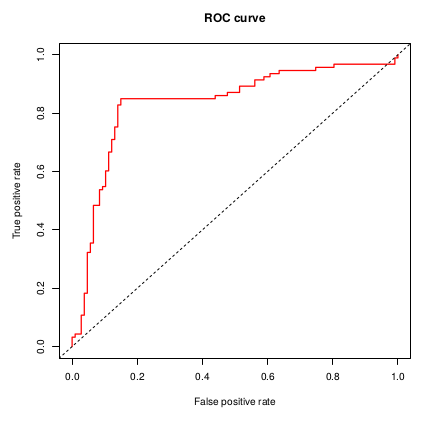

**Figure 4** -->

<!-- The ROC curve has the sensitivity on the vertical axis (y-axis) and 1-specificity (FDR) on the horizontal axis (x-axis).
The ideal ROC curve hugs the top left corner which corresponds to a high true positive rate and a low false positive rate.
The forty-five degree line that goes from bottom left (0,0) to upper right (1,1) shown as a black dotted line in the plot is considered to be a classifier that is no better than guessing i.e. the posterior probabilities are both 0.5. -->

<!-- A single number summary of the ROC curve is the _AUC_ which stands for area under the (ROC) curve.
The larger the AUC the better the classifier has done.
The forty-five degree line has an AUC of 0.50 so a good classifier will have AUC higher than random guessing.
For the ROC curve in Figure 4, the AUC is 0.8342.
This is a moderately good classifier, certainly better than random. -->